In [2]:
from precode import *
import numpy
import pandas as pd

data = np.load('AllSamples.mat')

ModuleNotFoundError: No module named 'precode'

In [ ]:
initial_centers = {}
for k in range(2, 11):
    centers = initial_S1("6771", k)  # please replace 0111 with your last four digit of your ID
    initial_centers[k] = centers

In [ ]:
def myKMeans(data, k, points):
    points2 = points.copy()
    iteration = 0
    centroids = {}
    #init the centroids
    for i in range(0,k):
        centroids[f"c{i}"] = points2[i]
    #print(centroids)
    while True:
        iteration += 1
        cp = {}
        for key in centroids:
            cp[key] = list()
        #classify each point
        for i in range(0,len(data)):
            distances = []
            for key, val in centroids.items():
                diff = abs(np.subtract(data[i],val))
                distances.append(np.sqrt((diff[0] **2) + (diff[1] **2)))
            cp[f"c{np.argmin(distances)}"].append(data[i])
        #print(classified_points)
        #Calculate the new Mean
        new_centroids = {}
        for key, val in classified_points.items():
            new_centroids[key] = np.array([np.mean([x[0] for x in cp[key]]), np.mean([x[1] for x in cp[key]])])
#         print(centroids.values())
#         print(new_centroids.values())
        total = 0
        for key,v in centroids.items():
            if(centroids[key].tolist() == new_centroids[key].tolist()):
                total += 1
        if(total == k):
            print(f"This took {iteration} iterations.")
            return [x for x in new_centroids.values()]
        else:
            centroids = new_centroids

In [ ]:
def loss_fn(data, k, points):
    centroids = {}
    #init the centroids
    for i in range(0,k):
        centroids[f"c{i}"] = points[i]
    classified_points = {}
    for key in centroids:
            classified_points[key] = 0
    #classify each point
    for i in range(0,len(data)):
        distances = []
        for key, val in centroids.items():
            diff = abs(numpy.subtract(data[i],val))
            distances.append(np.sqrt((diff[0] **2) + (diff[1] **2)))
        classified_points[f"c{np.argmin(distances)}"] += (min(distances)) ** 2
    return sum(classified_points.values())

In [ ]:
import matplotlib.pyplot as plt
#print(data[0])

#print(initial_centers)

def kMeans(data, k, points):
    plt.scatter([x[0] for x in data], [y[1] for y in data])
    for i in range(0,k):
        plt.scatter(points[i][0], points[i][1], label=f"c{i}")
    plt.legend()
    plt.show()

#kMeans(data, 3, initial_centers[3]) #displays centroid values on graph

def myKMeans(data, k, points):
    points2 = points.copy()
    iteration = 0
    c = {}

    for i in range(0,k):
        c[f"c{i}"] = points2[i]

    while True:
        iteration += 1
        cp = {}
        for key in c:
            cp[key] = list()

        for i in range(0,len(data)):
            distances = []
            for key, val in c.items():
                diff = abs(np.subtract(data[i],val))
                distances.append(np.sqrt((diff[0] **2) + (diff[1] **2)))
            cp[f"c{np.argmin(distances)}"].append(data[i])

        c2 = {}
        for key, val in cp.items():
            c2[key] = np.array([np.mean([x[0] for x in cp[key]]), np.mean([x[1] for x in cp[key]])])

        tot = 0
        for key,v in c.items():
            if(c[key].tolist() == c2[key].tolist()):
                tot += 1
        if(tot == k):
            return [x for x in c2.values()]
        else:
            c = c2

m = 2
myArr = []
news = myKMeans(data, m, initial_centers[m])
print(news[0])
#kMeans(data, m, news)
#m=2  [[4.85261193, 7.27164171],[5.00056234, 2.48542748]]
while m<11:
   news = myKMeans(data, m, initial_centers[m])
   #myArr.append(news)
   mL = []
   for x in range(len(news)):
    mL2 = []
    mL2.append(news[x][0])
    mL2.append(news[x][1])
    mL.append(mL2)
   myArr.append(mL)
   m += 1
print(myArr)


In [ ]:
for x in range(len(myArr)):
    print(myArr[x])

In [ ]:
def loss_function(data, k, points):
    c = {}  
    for i in range(0,k):
        c[f"c{i}"] = points[i]
    c2 = {}
    for key in c:
            c2[key] = 0
    for i in range(0,len(data)):
        distances = []
        for key, val in c.items():
            diff = abs(numpy.subtract(data[i],val))
            distances.append(np.sqrt((diff[0] **2) + (diff[1] **2)))
        c2[f"c{np.argmin(distances)}"] += (min(distances)) ** 2
    return sum(c2.values())

In [ ]:
q = 2
lfList = []
while q<11:
 myLoss = loss_function(data, q, myKMeans(data, q, initial_centers[q]))
 lfList.append(myLoss)
 #print(myLoss)
 q += 1
#print(loss_function(data, q, myKMeans(data, q, initial_centers[q])))
print(lfList)

In [ ]:
def initial_centroids(k):
    c = []
    d = np.zeros([len(data), k-1])
    
    centroid_1 = initial_centers[k]
    index_list.append(k)
    c.append(initial_centers[k])
  
    for i in range(k-1):
        d[:,i] = dist(c[i], data, ax = 1)
        dist_mean = np.mean(d[:,:i+1], axis=1)
        index = np.argmax(dist_mean)
        
        for j in range(0,len(index_list)):
            if index in index_list:
                dist_mean[index]=-1
                index=np.argmax(dist_mean)
        index_list.append(index)
        c.append(data[index])
    return c

def myKMeans (k):
    c=np.reshape(initial_centroids(k),(k,2))
    print('The centroids generated by the maximal distance approach are\n',c)
    
    #scatter plot of data and the randomly chosen centroids
    plt.scatter(X, Y, c='black')
    plt.scatter(c[:,0], c[:,1], marker='D', s=100, c='red')
    
     # for storing the old values of the centroids when they are updated 
    c_old = np.zeros(c.shape)
    
    # Labelling the clusters with suitable label - 0/1/2/3/4/5/6/7/8/9
    clusters = np.zeros(len(data))
    
    # Distance between new centroids and old centroids - this is imporatnt because loop will run till this distance becomes zero
    diff = dist(c, c_old, None)
    
    # Loop will run till the diff becomes zero
    while diff != 0:
        # Assigning each value to its closest cluster
        for i in range(len(data)):
            distances = dist(data[i], c)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        # Storing the old centroid values
        c_old = deepcopy(c)
        
        # Finding the new centroids by taking the average value
        for i in range(k):
            
            points = [data[j] for j in range(len(data)) if clusters[j] == i]
            c[i] = np.mean(points, axis=0)
        diff = dist(c, c_old, None)
    fig, ax = plt.subplots()
    for i in range(k):
            points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
            ax.scatter(points[:, 0], points[:, 1])
    ax.scatter(c[:, 0], c[:, 1], marker='X', s=100, c='black')
    
    #printing the final centroids after running the iterations
    print('The final centroids are\n',c)
    
    #adding the cluster label to the original data
    data_mod=np.insert(data,2,clusters,axis=1)
    
    #arranging the data in order of increasing value of data cluster id
    data_cluster_label_sorted=data_mod[data_mod[:,2].argsort(kind='mergesort')]
    
    #dataframe with the cluster label
    dataframe_cluster_label=pd.DataFrame({'Feature_1': data_cluster_label_sorted[:, 0], 'Feature_2': data_cluster_label_sorted[:, 1],'Cluster_Label':data_cluster_label_sorted[:,2]})
    
    #splliting the dataset into various subsets according to the cluster label
    subset={}
    for j in range (0,dataframe_cluster_label['Cluster_Label'].nunique()):
        subset[j]=(dataframe_cluster_label[dataframe_cluster_label['Cluster_Label']==j].drop('Cluster_Label',1)).to_numpy()
    
    #calculating the value of objective function/wcss
    wcss=0
    for j in range (0,dataframe_cluster_label['Cluster_Label'].nunique()):
        for k in range (0,len(subset[j])):
            wcss+=math.pow(dist(c[j],subset[j][k], None),2)
    list_wcss.append(wcss)
    print('WCSS is',wcss)

In [3]:
import scipy.io
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
from random import randrange
import operator

In [4]:
raw_data = scipy.io.loadmat("AllSamples.mat")
data = raw_data["AllSamples"]

In [5]:
#print(len(data))

300


In [8]:
initial_centers= {2: [1.92561853, 2.73857632], 3: [4.40450545, 6.75422193], 4: [7.12751003, 1.23747391], 5: [2.40998489, 7.99174945], 6: [2.97661653, 6.01021497], 7: [2.04945194, 2.75937105], 8: [7.44472802, 2.41849318], 9: [8.36230458, 3.08961725], 10: [4.80754093, 3.03464954]}
print(initial_centers)

{2: [1.92561853, 2.73857632], 3: [4.40450545, 6.75422193], 4: [7.12751003, 1.23747391], 5: [2.40998489, 7.99174945], 6: [2.97661653, 6.01021497], 7: [2.04945194, 2.75937105], 8: [7.44472802, 2.41849318], 9: [8.36230458, 3.08961725], 10: [4.80754093, 3.03464954]}


In [9]:
def Euclidean_distance(pt1, pt2):
    '''
    Find Euclidean distance between two points
    '''
    sum_ = 0

    for i in range(len(pt1)):
            sum_ += (pt1[i] - pt2[i])**2

    d = (sum_)**0.5
    return d

In [10]:
def Initialization_Strategy_2(k,data,centroids_set):
    '''
    Calculate initial centroids according to Strategy 2
    '''
    chosen = []
    not_chosen = data.tolist()


    for i in range(k):

        if i == 0:

            ch = random.choice(not_chosen)

        else:

            dist = {}
            for j in not_chosen:
                sum_d = 0
                for l in chosen:
                    sum_d += Euclidean_distance(j,l)
                dist[tuple(j)] = sum_d/len(chosen)

            sorted_dist = sorted(dist.items(), key=operator.itemgetter(1))
            ch = sorted_dist[-1][0]

        chosen.append(np.array(ch))
        not_chosen.remove(list(ch))
   
    k_count=0
    for c in chosen:
        centroids_set[k_count] = c
        k_count += 1

    return centroids_set

In [22]:
def K_means(k,data):   
    '''
    Run K means on the given data
    '''

    centroids = {}

    #Initialization
    centroids = Initialization_Strategy_2(k,data,centroids)

    for i in range(500):

        clusters = {}
        for i in range(k):
            clusters[i] = []

        #Calculating Euclidean Distance
        for points in data:
            distances = [Euclidean_distance(points,centroids[centroid]) for centroid in centroids]
            min_dist = distances.index(min(distances))
            clusters[min_dist].append(points)

        prev = dict(centroids)

        #Averaging over centroids
        for i in clusters:
            centroids[i] = np.average(clusters[i], axis = 0)

        converge = True

        #Checking convergence
        for centroid in centroids:

            org = prev[centroid]
            curr = centroids[centroid]

            objective = np.sum((curr - org)/org * 100.0)

            if objective > 0.0001:
                converge = False

        if converge:
            break

    return centroids,clusters,objective

In [11]:
def K_means(k,data):
    '''
    Run K means on the given data
    '''

    centroids = {}

    #Initialization
    centroids = Initialization_Strategy_2(k,data,centroids)

    for i in range(500):

        clusters = {}
        for i in range(k):
            clusters[i] = []

        #Calculating Euclidean Distance
        for points in data:
            distances = [Euclidean_distance(points,centroids[centroid]) for centroid in centroids]
            min_dist = distances.index(min(distances))
            clusters[min_dist].append(points)

        prev = dict(centroids)

        #Averaging over centroids
        for i in clusters:
            centroids[i] = np.average(clusters[i], axis = 0)

        converge = True

        #Checking convergence
        for centroid in centroids:

            org = prev[centroid]
            curr = centroids[centroid]

            objective = np.sum((curr - org)/org * 100.0)

            if objective > 0.0001:
                converge = False

        if converge:
            break

    return centroids,clusters,objective

In [12]:
def Objective_Plot(Objective_fun):
    '''
    Plot Objective function vs K
    '''
    K_x=range(2,11,1)
    plt.plot(K_x,Objective_fun)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Value of Objective Function')
    plt.title('Objective function vs No. of Clusters (k)')
    plt.show()


In [13]:
def Visualize_Clusters(centroids,clusters,i):
    '''
    Visualize clusters
    '''

    x = np.arange(10)
    ys = [i+x+(i*x)**2 for i in range(10)]

    colors = cm.rainbow(np.linspace(0, 1, len(ys)))

    for centroid in centroids:
        plt.scatter(centroids[centroid][0], centroids[centroid][1], s = 200, marker = "X",c='black')

    for i in clusters:
        color = colors[i]
        for points in clusters[i]:
            plt.scatter(points[0], points[1],color=color,s = 30)

    plt.title("Plot for k = "+str(i))
    plt.show()

In [23]:
Obj_fun=[]
for i in range(2,11):
    # Run K means
    centroids,clusters,obj = K_means(i,data)
    #Visualize Clusters
    #Visualize_Clusters(centroids,clusters,i)
    obj=0
    for k in range(i):
        obj+=np.sum((clusters[k]-centroids[k])**2)
    Obj_fun.append(obj)

    #Plot Objective function
    #Objective_Plot(Obj_fun)

In [37]:
initial_centers= {2: [1.92561853, 2.73857632], 3: [4.40450545, 6.75422193], 4: [7.12751003, 1.23747391], 5: [2.40998489, 7.99174945], 6: [2.97661653, 6.01021497], 7: [2.04945194, 2.75937105], 8: [7.44472802, 2.41849318], 9: [8.36230458, 3.08961725], 10: [4.80754093, 3.03464954]}
#print(initial_centers[2][0])

indices = np.random.choice(300, size=1, replace=False, p=None)
ca=[]
for index in indices:
    ca.append((data[index][0], data[index][1]))
    
print(ca)

[(2.6808091302336092, 1.6129822642791443)]


K value: 2

Initial Cluster Centers: [(1.92561853, 2.73857632), array([9.26998864, 9.62492869])]

Final Cluster Centers: [(5.000562341588762, 2.4854274751531933), (4.852611930287174, 7.271641711202775)]

K value: 3

Initial Cluster Centers: [(4.40450545, 6.75422193), array([ 3.85212146, -1.08715226]), array([9.26998864, 9.62492869])]

Final Cluster Centers: [(2.5614644894663545, 6.088613382895479), (5.477400388679034, 2.254981027984723), (6.497249620849709, 7.522972929895171)]

K value: 4

Initial Cluster Centers: [(7.12751003, 1.23747391), array([2.95297924, 9.65073899]), array([9.26998864, 9.62492869]), array([ 3.85212146, -1.08715226])]

Final Cluster Centers: [(6.783746087903545, 2.8501999866465444), (3.3426476922451784, 6.926028030100171), (7.179286211861507, 8.05207909972969), (2.852351493110535, 2.2818648297203246)]

K value: 5

Initial Cluster Centers: [(2.40998489, 7.99174945), array([ 3.85212146, -1.08715226]), array([9.26998864, 9.62492869]), array([7.68097556, 0.83542043]),

Final Cluster Centers: [(5.171841785983008, 4.219153691595018), (6.924315464035714, 8.214483357355427), (2.008571791924893, 3.5485064618288997), (5.260069320767429, 7.337286654492331), (2.698053429282906, 2.02422990430515), (8.161034371462438, 8.70366482576138), (2.541652523310345, 7.002678323536489), (7.556167822397726, 2.235167959857534), (9.269988642319534, 9.62492868721418), (3.4465080298793067, 0.4778450401325924)]

First Initialization


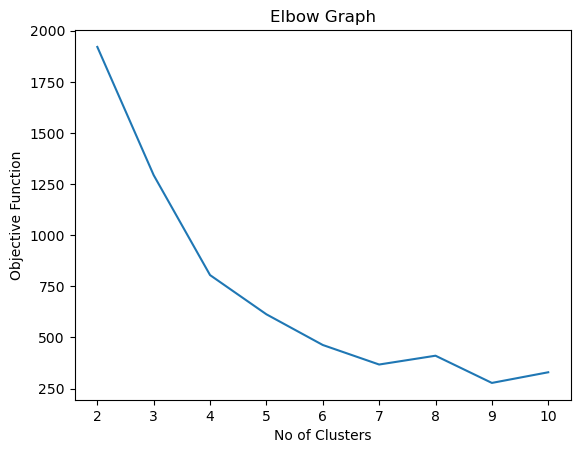

Second Initialization


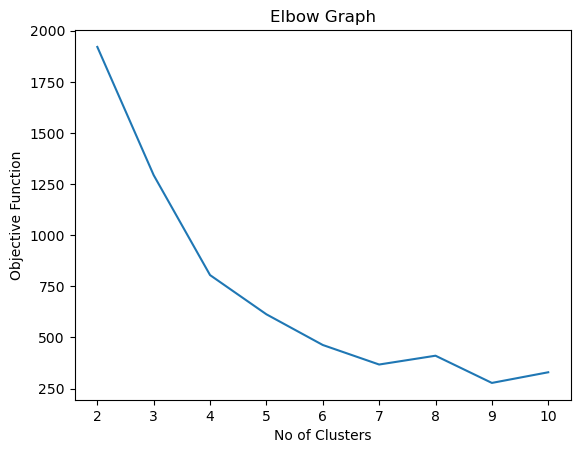

In [40]:
import scipy.io
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt

file = scipy.io.loadmat('AllSamples.mat')
Samp_X = []
Samp_Y = []
data = file.get('AllSamples')

for sample in data:
    Samp_X.append(sample[0])
    Samp_Y.append(sample[1])
ObjFunc1 = []
ObjFunc2 = []
for x in range(0, 2):

    K_Values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
    # implement for k from 2 to 10
    for k in range(2, 11):
        print("K value:", k)
        centroids_array = []
        # Select the first centroid randomly from data.
        indices = np.random.choice(300, size=1, replace=False, p=None)

        for index in indices:
            centroids_array.append((initial_centers[k][0], initial_centers[k][1]))

        for i in range(1, k):
            strategy2 = []
            for sample in data:
                dista = 0
                for center in centroids_array:
                    dista = dista + distance.euclidean(sample, center)

                avg_distance = dista / len(centroids_array)
                strategy2.append(avg_distance)

            max_dist_index = strategy2.index(max(strategy2))
            centroids_array.append(data[max_dist_index])
        print("")
        print("Initial Cluster Centers:", centroids_array)
        print("")

        final_centroids = []
        final_cluster_matrix = []
        Stop_Cond = False
        while (Stop_Cond != True):
            # create a distances matrix
            distances = np.ndarray(shape=(300, k), dtype=float)

            # To compute distance from each cluster center to each data point.

            for i in range(len(data)):
                for j in range(k):
                    dist = distance.euclidean(data[i], centroids_array[j])
                    distances[i][j] = dist        
            # Assign datapoints to the nearest centroid.

            c_index = []

            for i in range(len(distances)):
                distance_list = distances[i].tolist()
                min_index = distance_list.index(min(distance_list))
                c_index.append(min_index)

            # Recalculating the cluster centroids.
            new_cluster_centroids = []

            cluster_matrix = []
            for i in range(k):
                cluster = []
                new_centre = (0, 0)
                xsum = 0
                ysum = 0

                for j in range(len(c_index)):
                    if (i == c_index[j]):
                        cluster.append(data[j])

                for l in range(len(cluster)):
                    xsum = xsum + cluster[l][0]
                    ysum = ysum + cluster[l][1]
                if len(cluster) != 0:
                    new_centre = (xsum / len(cluster), ysum / len(cluster))
                    new_cluster_centroids.append(new_centre)
                    cluster_matrix.append(cluster)
                else:
                    new_cluster_centroids.append(centroids_array[i])


            # stop if new cluster centroids are equal to previous ones.

            count = 0

            for i in range(k):
                if (new_cluster_centroids[i][0] == centroids_array[i][0] and new_cluster_centroids[i][1] == centroids_array[i][1]):
                    count = count + 1

            if (count == k):
                Stop_Cond = True
                final_centroids = new_cluster_centroids
                final_cluster_matrix = cluster_matrix
 
            if Stop_Cond == False:
                for i in range(k):
                    centroids_array[i] = new_cluster_centroids[i]


        print("Final Cluster Centers:", final_centroids)
        print("")


        # Calculating the Objective Function value
        obj_value = 0.0
        for i in range(k):
            current_center = final_centroids[i]
            for sample in final_cluster_matrix[i]:
                obj_value = obj_value + (
                            distance.euclidean(sample, current_center) * distance.euclidean(sample, current_center))
        if (x == 0):
            ObjFunc1.append(obj_value)
        else:
            ObjFunc2.append(obj_value)

# Plotting Objective Function vs k values
print("First Initialization")
plt.plot(K_Values, ObjFunc1)
plt.title('Elbow Graph')
plt.xlabel('No of Clusters')
plt.ylabel('Objective Function')
plt.show()

print("Second Initialization")
plt.plot(K_Values, ObjFunc2)
plt.title('Elbow Graph')
plt.xlabel('No of Clusters')
plt.ylabel('Objective Function')
plt.show()

In [41]:
potentialAnswer= [[(5.000562341588762, 2.4854274751531933), (4.852611930287174, 7.271641711202775)], [(2.5614644894663545, 6.088613382895479), (5.477400388679034, 2.254981027984723), (6.497249620849709, 7.522972929895171)], [(6.783746087903545, 2.8501999866465444), (3.3426476922451784, 6.926028030100171), (7.179286211861507, 8.05207909972969), (2.852351493110535, 2.2818648297203246)], [(2.601232962568677, 6.91610505751996), (3.2125746077046626, 2.496580865799525), (7.756483249146484, 8.556689279063415), (7.252626831256577, 2.4001582635520533), (5.402525077573915, 6.736361752187993)], [(5.171841785983008, 4.219153691595018), (5.309444507053358, 7.451442698679931), (2.681986334188929, 2.094615867800809), (2.541652523310345, 7.002678323536489), (7.556167822397726, 2.235167959857534), (7.914309977818314, 8.519909807700076)], [(4.8681371322300135, 3.719341848215456), (5.464277356727894, 6.837713536435891), (2.242047519125402, 3.251007486318421), (2.5633381461259046, 6.978224800606624), (7.556167822397726, 2.235167959857534), (7.756483249146484, 8.556689279063415), (3.1690614508664035, 0.8143251472991676)],[(7.6133478201104765, 3.0481537116979247), (5.432070680361331, 6.869308835910069), (3.145061482959145, 0.9077065486588153), (7.267169511874265, 8.275692874735975), (3.4955665791995627, 3.5661123157286907), (8.398707529316267, 8.925497059743181), (7.059153076641542, 1.196049944754927), (2.5633381461259046, 6.978224800606624)],[(4.818330576085663, 3.69502320071854), (2.536501078790139, 6.859419784482168), (7.556167822397726, 2.235167959857534), (4.859398750231154, 7.941638208906054), (6.15468228405522, 5.701407205679413), (3.1660397272577874, 0.8616886118323305), (7.521973033096792, 8.160703999159), (2.214068054222364, 3.286445548570339), (8.411270107798906, 8.974903831852108)], [(5.171841785983008, 4.219153691595018), (6.924315464035714, 8.214483357355427), (2.008571791924893, 3.5485064618288997), (5.260069320767429, 7.337286654492331), (2.698053429282906, 2.02422990430515), (8.161034371462438, 8.70366482576138), (2.541652523310345, 7.002678323536489), (7.556167822397726, 2.235167959857534), (9.269988642319534, 9.62492868721418), (3.4465080298793067, 0.4778450401325924)]] 
potentialAnswer2=[[(5.000562341588762, 2.4854274751531933), (4.852611930287174, 7.271641711202775)],[(2.5614644894663545, 6.088613382895479), (5.477400388679034, 2.254981027984723), (6.497249620849709, 7.522972929895171)],[(6.783746087903545, 2.8501999866465444), (3.3426476922451784, 6.926028030100171), (7.179286211861507, 8.05207909972969), (2.852351493110535, 2.2818648297203246)],[(2.601232962568677, 6.91610505751996), (3.2125746077046626, 2.496580865799525), (7.756483249146484, 8.556689279063415), (7.252626831256577, 2.4001582635520533), (5.402525077573915, 6.736361752187993)],[(5.171841785983008, 4.219153691595018), (5.309444507053358, 7.451442698679931), (2.681986334188929, 2.094615867800809), (2.541652523310345, 7.002678323536489), (7.556167822397726, 2.235167959857534), (7.914309977818314, 8.519909807700076)],[(4.8681371322300135, 3.719341848215456), (5.464277356727894, 6.837713536435891), (2.242047519125402, 3.251007486318421), (2.5633381461259046, 6.978224800606624), (7.556167822397726, 2.235167959857534), (7.756483249146484, 8.556689279063415), (3.1690614508664035, 0.8143251472991676)], [(7.6133478201104765, 3.0481537116979247), (5.432070680361331, 6.869308835910069), (3.145061482959145, 0.9077065486588153), (7.267169511874265, 8.275692874735975), (3.4955665791995627, 3.5661123157286907), (8.398707529316267, 8.925497059743181), (7.059153076641542, 1.196049944754927), (2.5633381461259046, 6.978224800606624)],[(4.818330576085663, 3.69502320071854), (2.536501078790139, 6.859419784482168), (7.556167822397726, 2.235167959857534), (4.859398750231154, 7.941638208906054), (6.15468228405522, 5.701407205679413), (3.1660397272577874, 0.8616886118323305), (7.521973033096792, 8.160703999159), (2.214068054222364, 3.286445548570339), (8.411270107798906, 8.974903831852108)],[(5.171841785983008, 4.219153691595018), (6.924315464035714, 8.214483357355427), (2.008571791924893, 3.5485064618288997), (5.260069320767429, 7.337286654492331), (2.698053429282906, 2.02422990430515), (8.161034371462438, 8.70366482576138), (2.541652523310345, 7.002678323536489), (7.556167822397726, 2.235167959857534), (9.269988642319534, 9.62492868721418), (3.4465080298793067, 0.4778450401325924)]]


for x in potentialAnswer:
    print(x)

[(5.000562341588762, 2.4854274751531933), (4.852611930287174, 7.271641711202775)]
[(2.5614644894663545, 6.088613382895479), (5.477400388679034, 2.254981027984723), (6.497249620849709, 7.522972929895171)]
[(6.783746087903545, 2.8501999866465444), (3.3426476922451784, 6.926028030100171), (7.179286211861507, 8.05207909972969), (2.852351493110535, 2.2818648297203246)]
[(2.601232962568677, 6.91610505751996), (3.2125746077046626, 2.496580865799525), (7.756483249146484, 8.556689279063415), (7.252626831256577, 2.4001582635520533), (5.402525077573915, 6.736361752187993)]
[(5.171841785983008, 4.219153691595018), (5.309444507053358, 7.451442698679931), (2.681986334188929, 2.094615867800809), (2.541652523310345, 7.002678323536489), (7.556167822397726, 2.235167959857534), (7.914309977818314, 8.519909807700076)]
[(4.8681371322300135, 3.719341848215456), (5.464277356727894, 6.837713536435891), (2.242047519125402, 3.251007486318421), (2.5633381461259046, 6.978224800606624), (7.556167822397726, 2.23516

In [ ]:
from precode import * 

data = np.load('AllSamples.npy')
initial_centers = {}

for k in range(2, 11):
    centers = initial_S2("6771", k)  # please replace 0111 with your last four digit of your ID
    initial_centers[k] = centers 
print(initial_centers)
#enter your last 4 digits of student id instead of 0000

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
#print(data[0])

#print(initial_centers)
def distan(x, y,ax=1):
    return np.linalg.norm(x - y,axis=ax)

dataframe = pd.DataFrame({'F1': data[:, 0], 'F2': data[:, 1]})

In [ ]:
il=[]
lossf=[]
X,Y = data[:,0], data[:,1]

def initCentroids(k):
    c = []
    d = np.zeros([len(data), k-1])  
    centroid_1 = initial_centers[k]
    il.append(k)
    c.append(initial_centers[k])
    for i in range(k-1):
        d[:,i] = distan(c[i], data, ax = 1)
        d_mean = np.mean(d[:,:i+1], axis=1)
        ind = np.argmax(d_mean)
        for j in range(0,len(il)):
            if ind in il:
                d_mean[ind]=-1
                ind=np.argmax(d_mean)
        il.append(ind)
        c.append(data[ind])
    return c

In [ ]:
def myKMeans(k):
    c=np.reshape(initCentroids(k),(k,2))
    c_old = np.zeros(c.shape)
    cl = np.zeros(len(data))    
    difference = distan(c, c_old, None)

    while difference != 0:
        for i in range(len(data)):
            distances = distan(data[i], c)
            clust = np.argmin(distances)
            cl[i] = clust
        c_old = c.copy()
        
        for i in range(k):   
            p = [data[j] for j in range(len(data)) if cl[j] == i]
            c[i] = np.mean(p, axis=0)
        difference = distan(c, c_old, None)
    fig, ax = plt.subplots()
    for i in range(k):
            points = np.array([data[j] for j in range(len(data)) if cl[j] == i])
            ax.scatter(points[:, 0], points[:, 1])
    ax.scatter(c[:, 0], c[:, 1], marker='X', s=100, c='black')
    
    print('The final centroids are\n',c)
    myArr.append(c)
    data_mod=np.insert(data,2,cl,axis=1)
    data_cluster_label_sorted=data_mod[data_mod[:,2].argsort(kind='mergesort')]
    dataframe_cluster_label=pd.DataFrame({'F1': data_cluster_label_sorted[:, 0], 'F2': data_cluster_label_sorted[:, 1],'Cluster_Label':data_cluster_label_sorted[:,2]})
    subset={}
    for j in range (0,dataframe_cluster_label['Cluster_Label'].nunique()):
        subset[j]=(dataframe_cluster_label[dataframe_cluster_label['Cluster_Label']==j].drop('Cluster_Label',axis=1)).to_numpy()
    lof=0
    for j in range (0,dataframe_cluster_label['Cluster_Label'].nunique()):
        for k in range (0,len(subset[j])):
            lof+=math.pow(distan(c[j],subset[j][k], None),2)
    lossf.append(lof)
    print('Loss Function is',lof)

#myKMeans(10)

In [ ]:
### TEST FUNCTION: test_project2_part2_1cen
# DO NOT REMOVE THE LINE ABOVE
answer=[[(5.000562341588762, 2.4854274751531933), (4.852611930287174, 7.271641711202775)],[(2.5614644894663545, 6.088613382895479), (5.477400388679034, 2.254981027984723), (6.497249620849709, 7.522972929895171)],[(6.783746087903545, 2.8501999866465444), (3.3426476922451784, 6.926028030100171), (7.179286211861507, 8.05207909972969), (2.852351493110535, 2.2818648297203246)],[(2.601232962568677, 6.91610505751996), (3.2125746077046626, 2.496580865799525), (7.756483249146484, 8.556689279063415), (7.252626831256577, 2.4001582635520533), (5.402525077573915, 6.736361752187993)],[(3.502455, 3.62870476),(7.75648325, 8.55668928),(3.14506148, 0.90770655),(2.52382885, 7.02897469),(7.41419243, 2.32169114),(5.46427736, 6.83771354)],[(3.49556658, 3.56611232), (7.91430998, 8.51990981), (3.14506148, 0.90770655), (5.0217766,  7.82401258), (7.42803426, 2.28291867), (6.15468228, 5.70140721), (2.56333815, 6.9782248)], [(7.55616782, 2.23516796), (5.46427736, 6.83771354), (3.16906145, 0.81432515), (8.36070221, 8.91063803), (4.86813713, 3.71934185), (7.24289713, 8.25583284), (2.24204752, 3.25100749), (2.56333815, 6.9782248)],[(5.34560332, 4.20335478),(3.13834768, 5.93372322),(3.16906145, 0.81432515),(8.39870753, 8.92549706),(5.1979411,  7.45907452),(2.24204752, 3.25100749),(7.34195588, 8.23743982),(7.55616782, 2.23516796),(2.18321462, 7.70355341)],[(4.81833058, 3.6950232),(8.39870753, 8.92549706),(3.44650803, 0.47784504),(4.78842518, 7.88291646),(7.55616782, 2.23516796),(2.53650108, 6.85941978),(6.15468228, 5.70140721),(2.00857179, 3.54850646),(7.34195588, 8.23743982),(2.69805343, 2.0242299)]]
#values above were found via entering myKMeans(k) with respective k-value

for x in range(len(answer)):
    print(answer[x])

In [ ]:
### TEST FUNCTION: test_project2_part2_loss
# DO NOT REMOVE THE LINE ABOVE
myLoss2=[1921.033485856205, 1293.7774523911348, 805.1166457472608, 613.282439205604, 476.2965705269664, 397.6259, 352.244015760927, 292.5007593205809, 260.04019829095625]


for x in range(len(myLoss2)):
    print(myLoss2[x])

In [ ]:
plt.plot([2,3,4,5,6,7,8,9,10], myLoss2)
plt.title("Loss Function vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Loss Function")
plt.show()

#Loss function plot

In [ ]:
myKMeans(10)
#Plot to show Final Clustering and Centroids for all clusters

In [ ]:
import scipy.io
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
from random import randrange
import operator


raw_data = scipy.io.loadmat("AllSamples.mat")
data = raw_data["AllSamples"]


id = "6771"
initial_centers= {2: [[7.45225989, 2.26860809],
       [7.39015357, 1.13206806]], 3: [[7.52963009, 8.79617112],
       [1.20162248, 7.68639714],
       [7.1712312 , 5.16316266]], 4: [[2.78903847, 6.44350728],
       [3.89523379, 0.70718356],
       [4.96433498, 7.88753239],
       [2.33338702, 7.23913284]], 5: [[2.58046907, 6.53023549],
       [1.81229618, 3.40781697],
       [2.0614632 , 8.22584366],
       [1.51180219, 7.48293717],
       [7.25412082, 2.77862318]], 6: [[1.76496239, 6.98004057],
       [7.06572   , 2.08940967],
       [6.99180377, 5.7932428 ],
       [5.01728788, 3.76311975],
       [2.25790845, 7.44778003],
       [7.57805025, 3.82487017]], 7: [[4.7585105 , 8.24317459],
       [2.3085098 , 7.39324133],
       [2.73285832, 2.83024707],
       [8.21897526, 8.9510505 ],
       [2.14633887, 8.83030888],
       [2.48989693, 8.40047863],
       [5.33498937, 3.07430754]], 8: [[6.2091503 , 6.16038763],
       [3.2881521 , 0.71796855],
       [3.54461267, 0.94261882],
       [3.72610844, 5.20432439],
       [4.6733967 , 7.14753742],
       [2.06136024, 3.54047797],
       [4.4280969 , 7.41377907],
       [8.00706441, 2.77531997]], 9: [[ 4.05095774,  4.05212767],
       [ 2.80096609,  1.03176348],
       [ 1.9311184 ,  6.93692984],
       [ 8.20129386,  9.21291541],
       [ 8.12343078,  2.60762469],
       [ 5.57009665,  8.3870942 ],
       [ 6.76851611,  1.38337541],
       [ 1.79534908,  3.7348206 ],
       [ 6.5807212 , -0.0766824 ]], 10: [[3.53350737, 0.33198894],
       [4.95728696, 6.90897984],
       [5.14167285, 5.71626939],
       [6.12393256, 5.49223251],
       [4.97304553, 7.4290438 ],
       [7.68097556, 0.83542043],
       [7.60284588, 0.778726  ],
       [2.69511302, 5.93967352],
       [7.93432052, 8.17735191],
       [5.04470093, 8.49060119]]}
#print(initial_centers)

X, Y = data[:,0], data[:,1]

In [ ]:
#initial Selection 1

In [ ]:
import matplotlib.pyplot as plt
#print(data[0])

#print(initial_centers)

def kMeans(data, k, points):
    plt.scatter([x[0] for x in data], [y[1] for y in data])
    for i in range(0,k):
        plt.scatter(points[i][0], points[i][1], label=f"c{i}")
    plt.legend()
    plt.show()

#kMeans(data, 3, initial_centers[3]) #displays centroid values on graph

def myKMeans(data, k, points):
    points2 = points.copy()
    iteration = 0
    c = {}

    for i in range(0,k):
        c[f"c{i}"] = points2[i]

    while True:
        iteration += 1
        cp = {}
        for key in c:
            cp[key] = list()

        for i in range(0,len(data)):
            distances = []
            for key, val in c.items():
                diff = abs(np.subtract(data[i],val))
                distances.append(np.sqrt((diff[0] **2) + (diff[1] **2)))
            cp[f"c{np.argmin(distances)}"].append(data[i])

        c2 = {}
        for key, val in cp.items():
            c2[key] = np.array([np.mean([x[0] for x in cp[key]]), np.mean([x[1] for x in cp[key]])])

        tot = 0
        for key,v in c.items():
            if(c[key].tolist() == c2[key].tolist()):
                tot += 1
        if(tot == k):
            return [x for x in c2.values()]
        else:
            c = c2

m = 2
myArr = []
news = myKMeans(data, m, initial_centers[m])
print(news[0])
#kMeans(data, m, news)
#m=2  [[4.85261193, 7.27164171],[5.00056234, 2.48542748]]
while m<11:
   news = myKMeans(data, m, initial_centers[m])
   #myArr.append(news)
   mL = []
   for x in range(len(news)):
    mL2 = []
    mL2.append(news[x][0])
    mL2.append(news[x][1])
    mL.append(mL2)
   myArr.append(mL)
   m += 1
print(myArr)
 

def loss_function(data, k, points):
    c = {}  
    for i in range(0,k):
        c[f"c{i}"] = points[i]
    c2 = {}
    for key in c:
            c2[key] = 0
    for i in range(0,len(data)):
        distan = []
        for key, val in c.items():
            diff = abs(numpy.subtract(data[i],val))
            distan.append(np.sqrt((diff[0] **2) + (diff[1] **2)))
        c2[f"c{np.argmin(distan)}"] += (min(distan)) ** 2
    return sum(c2.values())
    
q = 2
lfList = []
while q<11:
 myLoss = loss_function(data, q, myKMeans(data, q, initial_centers[q]))
 lfList.append(myLoss)
 #print(myLoss)
 q += 1
#print(loss_function(data, q, myKMeans(data, q, initial_centers[q])))
print(lfList)
